**PDF loader**

In [3]:
!pip install -qU langchain-community pypdf

In [5]:
from langchain_community.document_loaders import PyPDFLoader

In [21]:
# Loading contents from Book 1
loader1 = PyPDFLoader("/content/bnm.pdf")
pdf_pages1=loader1.load() # contents of the book are loaded in langchain format

In [30]:
len(pdf_pages1)

180

In [27]:
# Checking contents  of first page from Book 1
pdf_pages1[0]

Document(metadata={'producer': 'pdfTeX-1.40.21', 'creator': 'LaTeX with hyperref', 'creationdate': '2021-02-01T17:26:39+01:00', 'author': '', 'title': '', 'subject': '', 'keywords': '', 'moddate': '2021-02-01T17:26:39+01:00', 'trapped': '/False', 'ptex.fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) kpathsea version 6.3.2', 'source': '/content/bnm.pdf', 'total_pages': 180, 'page': 0, 'page_label': 'i'}, page_content='Ivo F. Sbalzarini\nBasic Numerical Methods\nLecture Notes\nTU Dresden, Faculty of Computer Science\nChair of Scientiﬁc Computing for Systems Biology\nProf. Dr. sc. techn. Dipl. Masch.-Ing. ETH Ivo F. Sbalzarini\nCenter for Systems Biology Dresden, TUD & MPI-CBG\nWinter 2020/21')

In [25]:
# Loading contents from Book 2
loader2 = PyPDFLoader("/content/cfd.pdf")
pdf_pages2=loader2.load() # contents of the book are loaded in langchain format

In [31]:
len(pdf_pages2)

606

In [26]:
# Checking contents  of first page from Book 2
pdf_pages2[0]

Document(metadata={'producer': 'Acrobat Distiller 10.0.0 (Windows)', 'creator': 'Adobe InDesign CC 14.0 (Windows)', 'creationdate': '2019-08-09T12:00:03+05:30', 'author': '0009172', 'moddate': '2019-08-14T21:16:32+05:30', 'title': '43507_4_En_Print.indd', 'source': '/content/cfd.pdf', 'total_pages': 606, 'page': 0, 'page_label': 'C1'}, page_content='Computational \nMethods for\nFluid Dynamics\nJoel H. Ferziger\nMilovan Perić\nRobert L. Street\nFourth Edition')

In [28]:
# Combining contents from book 1 and book 2
combined_pages = pdf_pages1 + pdf_pages2

In [29]:
len(combined_pages)

786

**Chunking**

In [32]:
pip install -U langchain-text-splitters

In [36]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [37]:
chunk_size = 1024
chunk_overlap =200

In [38]:
splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)

In [39]:
chuncked_data = splitter.split_documents(combined_pages)

In [43]:
chuncked_data[0]

Document(metadata={'producer': 'pdfTeX-1.40.21', 'creator': 'LaTeX with hyperref', 'creationdate': '2021-02-01T17:26:39+01:00', 'author': '', 'title': '', 'subject': '', 'keywords': '', 'moddate': '2021-02-01T17:26:39+01:00', 'trapped': '/False', 'ptex.fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) kpathsea version 6.3.2', 'source': '/content/bnm.pdf', 'total_pages': 180, 'page': 0, 'page_label': 'i'}, page_content='Ivo F. Sbalzarini\nBasic Numerical Methods\nLecture Notes\nTU Dresden, Faculty of Computer Science\nChair of Scientiﬁc Computing for Systems Biology\nProf. Dr. sc. techn. Dipl. Masch.-Ing. ETH Ivo F. Sbalzarini\nCenter for Systems Biology Dresden, TUD & MPI-CBG\nWinter 2020/21')

In [44]:
len(chuncked_data)

2381

**Embeddings**

In [45]:
from langchain_community.embeddings import HuggingFaceEmbeddings

In [46]:
multilingual_embeddings = HuggingFaceEmbeddings(model_name="intfloat/multilingual-e5-large")

/tmp/ipython-input-3648109135.py:1: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFaceEmbeddings``.
  multilingual_embeddings = HuggingFaceEmbeddings(model_name="intfloat/multilingual-e5-large")
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warning

modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

**Vector DB - Chroma**

In [48]:
!pip install chromadb --quiet

In [49]:
from langchain_community.vectorstores import Chroma

In [50]:
persist_directory = "/db/chroma/"

In [51]:
vectordb = Chroma.from_documents(
    documents=chuncked_data,
    embedding=multilingual_embeddings,
    persist_directory=persist_directory
)

In [52]:
question = "what is eigen vector?"

In [53]:
vectordb.similarity_search(question, k=3)

[Document(metadata={'title': '', 'producer': 'pdfTeX-1.40.21', 'author': '', 'creator': 'LaTeX with hyperref', 'page_label': '42', 'total_pages': 180, 'page': 51, 'keywords': '', 'source': '/content/bnm.pdf', 'moddate': '2021-02-01T17:26:39+01:00', 'subject': '', 'creationdate': '2021-02-01T17:26:39+01:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) kpathsea version 6.3.2', 'trapped': '/False'}, page_content='3.3.1 Properties of the singular value decomposition\nThe singular values and singular vectors provide an analogous concept for rect-\nangular matrices as eigenvalues and eigenvectors do for square matrices. The fol-\nlowing important properties of the singular value decomposition are frequently\nexploited in applications:'),
 Document(metadata={'author': '', 'creationdate': '2021-02-01T17:26:39+01:00', 'title': '', 'total_pages': 180, 'ptex.fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) kpathsea version 6.3.2',

In [54]:
vectordb.similarity_search_with_score(question, k=3)

[(Document(metadata={'page': 51, 'subject': '', 'title': '', 'page_label': '42', 'creationdate': '2021-02-01T17:26:39+01:00', 'author': '', 'ptex.fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) kpathsea version 6.3.2', 'total_pages': 180, 'producer': 'pdfTeX-1.40.21', 'trapped': '/False', 'source': '/content/bnm.pdf', 'creator': 'LaTeX with hyperref', 'moddate': '2021-02-01T17:26:39+01:00', 'keywords': ''}, page_content='3.3.1 Properties of the singular value decomposition\nThe singular values and singular vectors provide an analogous concept for rect-\nangular matrices as eigenvalues and eigenvectors do for square matrices. The fol-\nlowing important properties of the singular value decomposition are frequently\nexploited in applications:'),
  0.30880483984947205),
 (Document(metadata={'trapped': '/False', 'creationdate': '2021-02-01T17:26:39+01:00', 'keywords': '', 'producer': 'pdfTeX-1.40.21', 'author': '', 'moddate': '2021-02-01T17:26:39+01:00', 'title'

**Retrieval**

In [55]:
vectordb.max_marginal_relevance_search(question, k=3, fetch_k=10)

[Document(metadata={'creationdate': '2021-02-01T17:26:39+01:00', 'subject': '', 'source': '/content/bnm.pdf', 'moddate': '2021-02-01T17:26:39+01:00', 'page': 51, 'author': '', 'producer': 'pdfTeX-1.40.21', 'trapped': '/False', 'title': '', 'ptex.fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) kpathsea version 6.3.2', 'page_label': '42', 'total_pages': 180, 'creator': 'LaTeX with hyperref', 'keywords': ''}, page_content='3.3.1 Properties of the singular value decomposition\nThe singular values and singular vectors provide an analogous concept for rect-\nangular matrices as eigenvalues and eigenvectors do for square matrices. The fol-\nlowing important properties of the singular value decomposition are frequently\nexploited in applications:'),
 Document(metadata={'source': '/content/bnm.pdf', 'creationdate': '2021-02-01T17:26:39+01:00', 'moddate': '2021-02-01T17:26:39+01:00', 'trapped': '/False', 'ptex.fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40

**Meta data filtering**

In [56]:
vectordb.similarity_search(question, k=3, filter={"source":"/content/cfd.pdf"})

[Document(metadata={'source': '/content/cfd.pdf', 'title': '43507_4_En_Print.indd', 'total_pages': 606, 'creationdate': '2019-08-09T12:00:03+05:30', 'creator': 'Adobe InDesign CC 14.0 (Windows)', 'producer': 'Acrobat Distiller 10.0.0 (Windows)', 'moddate': '2019-08-14T21:16:32+05:30', 'page_label': '135', 'page': 148, 'author': '0009172'}, page_content='5.3 Iterative Methods 135\nmethod. In particular, the eigenvalue(s) with largest magnitude (the spectral radius\nof the matrix) determines how rapidly the solution is reached; see Sect. 5.3.2.T h e\neigenvector(s) associated with this eigenvalue(s) determines the spatial distribution\nof the iteration error and varies considerably from method to method. Let us brieﬂy\nreview the behavior of these entities for some of the methods presented above. The\nproperties are given for the Laplace equation; most of them generalize to other elliptic\npartial differential equations.\nFor the Laplace equation, the two largest eigenvalues of the Jacob

**Groq**

In [57]:
!pip install langchain-groq --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 6.7 MB/s eta 0:00:00


In [58]:
import getpass
import os

if "GROQ_API_KEY" not in os.environ:
    os.environ["GROQ_API_KEY"] = getpass.getpass("Enter your Groq API key: ")

Enter your Groq API key: ··········


In [59]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0,
    max_tokens=250,
)

In [60]:
llm.invoke("write a poem about nature")

AIMessage(content="In twilight's hush, where shadows play,\nThe forest whispers secrets of the day,\nThe trees, like sentinels of old,\nStand guard, their leaves a rustling gold.\n\nThe wind, a wanderer, stirs the air,\nAnd scents of blooming flowers fill the lair,\nThe sun, a fiery orb, sets low,\nPainting the sky with hues of rose and glow.\n\nThe river's voice, a gentle stream,\nEchoes through the valleys, a soothing dream,\nThe mountains rise, a majestic sight,\nTheir peaks, a challenge to the morning light.\n\nThe earth, a canvas, vibrant and wide,\nA tapestry of life, where creatures reside,\nThe stars, a twinkling show, above,\nA celestial display, of infinite love.\n\nIn nature's arms, we find our peace,\nA sense of calm, our worries release,\nThe world, a wonder, full of might,\nA beauty that inspires, and fills our sight.\n\nSo let us cherish, this gift so rare,\nThis world of wonder, beyond compare,\nAnd honor nature, in all its might,\nFor it is our home, our guiding light.

In [61]:
response = llm.invoke("write a poem about nature")

In [62]:
response.content

"In twilight's hush, where shadows play,\nThe forest whispers secrets of the day,\nThe trees, like sentinels of old,\nStand guard, their leaves a rustling gold.\n\nThe wind, a wanderer, stirs the air,\nAnd scents of blooming flowers fill the lair,\nThe sun, a fiery orb, sets low,\nPainting the sky with hues of rose and glow.\n\nThe river's voice, a gentle stream,\nEchoes through the valleys, a soothing dream,\nThe mountains rise, a majestic sight,\nTheir peaks, a challenge to the morning light.\n\nThe earth, a canvas, vibrant and wide,\nA tapestry of life, where creatures reside,\nThe stars, a twinkling show, above,\nA celestial display, of infinite love.\n\nIn nature's arms, we find our peace,\nA sense of calm, our worries release,\nThe world, a wonder, full of might,\nA beauty that inspires, and fills our sight.\n\nSo let us cherish, this gift so rare,\nThis world of wonder, beyond compare,\nAnd honor nature, in all its might,\nFor it is our home, our guiding light."

**Prompt engineering**

In [87]:
system_prompt ={
    "You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question."
    "If you don't know the answer, just say that you don't know, Use three sentences maximum and keep the answer concise."
    "Answer all the question to the best of your ability."
}

In [88]:
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage

In [89]:
system_message = [SystemMessage(content=system_prompt)]

In [90]:
question = "what is eigen vector?"

In [91]:
vectordb.similarity_search(question, k=3)

[Document(metadata={'subject': '', 'author': '', 'moddate': '2021-02-01T17:26:39+01:00', 'total_pages': 180, 'trapped': '/False', 'source': '/content/bnm.pdf', 'page_label': '42', 'ptex.fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) kpathsea version 6.3.2', 'creationdate': '2021-02-01T17:26:39+01:00', 'creator': 'LaTeX with hyperref', 'page': 51, 'keywords': '', 'producer': 'pdfTeX-1.40.21', 'title': ''}, page_content='3.3.1 Properties of the singular value decomposition\nThe singular values and singular vectors provide an analogous concept for rect-\nangular matrices as eigenvalues and eigenvectors do for square matrices. The fol-\nlowing important properties of the singular value decomposition are frequently\nexploited in applications:'),
 Document(metadata={'page_label': '43', 'keywords': '', 'total_pages': 180, 'creationdate': '2021-02-01T17:26:39+01:00', 'subject': '', 'producer': 'pdfTeX-1.40.21', 'ptex.fullbanner': 'This is pdfTeX, Version 3.1415926

In [92]:
docs = vectordb.similarity_search_with_score(question, k=5)

In [93]:
import pandas as pd

_docs = pd.DataFrame(
    [(question, doc[0].page_content, doc[0].metadata["source"], doc[0].metadata.get("page"), doc[1]) for doc in docs],
    columns=["query", "paragraph", "document", "page_number", "relevant_score"]
)

In [94]:
_docs

,query,paragraph,document,page_number,relevant_score
0,what is eigen vector?,3.3.1 Properties of the singular value decompo...,/content/bnm.pdf,51,0.308805
1,what is eigen vector?,"A⃗ x= USVT⃗ x= U⃗y′and since ⃗ x= V⃗ y, we hav...",/content/bnm.pdf,52,0.337594
2,what is eigen vector?,5.3 Iterative Methods 135\nmethod. In particul...,/content/cfd.pdf,148,0.344597
3,what is eigen vector?,"Germany, and subsequently edited, extended, an...",/content/bnm.pdf,8,0.346926
4,what is eigen vector?,5.3 Iterative Methods 119\nwhere K is the numb...,/content/cfd.pdf,132,0.356819


In [95]:
context = "\n\n".join(_docs["paragraph"])

In [96]:
context

'3.3.1 Properties of the singular value decomposition\nThe singular values and singular vectors provide an analogous concept for rect-\nangular matrices as eigenvalues and eigenvectors do for square matrices. The fol-\nlowing important properties of the singular value decomposition are frequently\nexploited in applications:\n\nA⃗ x= USVT⃗ x= U⃗y′and since ⃗ x= V⃗ y, we have ⃗y′= S⃗ y. This diagonal\nmap is deﬁned by the singular value matrixS = UTAV = B (see Fig. 3.3).\nTherefore, the column vectors ⃗ v(i) of V and ⃗ u(i) of U, together with the\nsingular values si, completely describe the geometry of the linear map A,\nin analogy to eigenvalues and eigenvectors for linear maps Rn −→Rn.\nFigure 3.3: Schematic of the relation between a linear map A and its SVD.\n\n5.3 Iterative Methods 135\nmethod. In particular, the eigenvalue(s) with largest magnitude (the spectral radius\nof the matrix) determines how rapidly the solution is reached; see Sect. 5.3.2.T h e\neigenvector(s) associated w

In [97]:
human_message = [HumanMessage(content= context + question)]

In [82]:
result = llm.invoke(human_message)

In [100]:
result.content

'The text does not explicitly state what the eigenvector is, but based on the context, it can be inferred that the eigenvector is a vector that is associated with the eigenvalue. In linear algebra, an eigenvector of a matrix is a non-zero vector that, when the matrix is multiplied by it, results in a scaled version of the same vector. The scalar is known as the eigenvalue.\n\nIn the given text, the eigenvector is represented by the symbol ψk, and it is used to express the initial error ϵ0 in terms of a linear combination of these eigenvectors. The coefficients of this linear combination are denoted by ak.\n\nThe eigenvector ψk is a vector that belongs to the vector space Rn, and it is assumed to form a complete set, meaning that it can be used to express any vector in Rn as a linear combination of these eigenvectors.\n\nIn the context of the Laplace equation, the eigenvectors are used to describe the spatial distribution of the iteration error, and they are characterized by their smoot

**Memory**

In [101]:
!pip install langgraph --quiet

In [110]:
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, MessagesState, StateGraph

workflow = StateGraph(state_schema=MessagesState)

def call_model(state: MessagesState):
  system_prompt = (
      "You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question."
      "If you don't know the answer, just say that you don't know, Use three sentences maximum and keep the answer concise."
  )
  messages = [SystemMessage(content=system_prompt)] + state["messages"]
  response = llm.invoke(messages)
  return {"messages": response}


workflow.add_node("model", call_model)
workflow.add_edge(START, "model")


memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

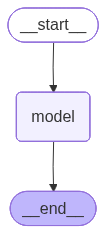

In [111]:
app

In [112]:
app.invoke(
    {"messages": [HumanMessage(content="Translate to French: what is eigen vector?")]},
    config={"configurable": {"thread_id": "1"}},
)

{'messages': [HumanMessage(content='Translate to French: what is eigen vector?', additional_kwargs={}, response_metadata={}, id='a161c57d-765e-43de-bb92-0f2465588c00'),
  AIMessage(content='L\'eigenvector est appelé "vecteur propre" en français. \n\nC\'est un vecteur qui, lorsqu\'il est multiplié par une matrice, est simplement élargi ou rétréci, mais pas tourné.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 55, 'prompt_tokens': 93, 'total_tokens': 148, 'completion_time': 0.148971546, 'completion_tokens_details': None, 'prompt_time': 0.018258655, 'prompt_tokens_details': None, 'queue_time': 0.058018313, 'total_time': 0.167230201}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_9ca2574dca', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b8f2f-13c1-75d2-a96d-91c101271d6f-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 93, 'output_tokens': 55, 'to

In [113]:
app.invoke(
    {"messages": [HumanMessage(content="what did i ask you?")]},
    config={"configurable": {"thread_id": "1"}},
)

{'messages': [HumanMessage(content='Translate to French: what is eigen vector?', additional_kwargs={}, response_metadata={}, id='a161c57d-765e-43de-bb92-0f2465588c00'),
  AIMessage(content='L\'eigenvector est appelé "vecteur propre" en français. \n\nC\'est un vecteur qui, lorsqu\'il est multiplié par une matrice, est simplement élargi ou rétréci, mais pas tourné.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 55, 'prompt_tokens': 93, 'total_tokens': 148, 'completion_time': 0.148971546, 'completion_tokens_details': None, 'prompt_time': 0.018258655, 'prompt_tokens_details': None, 'queue_time': 0.058018313, 'total_time': 0.167230201}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_9ca2574dca', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b8f2f-13c1-75d2-a96d-91c101271d6f-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 93, 'output_tokens': 55, 'to